In [1]:
import numpy as np
import matplotlib.pyplot as plt
from clones.data.experiments import Experiment
from clones.annotation.model_selection import ModelSelection
from clones.annotation.community import KatzLabeler, InfomapLabeler

%matplotlib inline

# load stack

In [2]:
experiment_path = '/Users/Sebi/Documents/grad_school/research/ratio/data/published/clones/yanE833/'

# load experiment
experiment = Experiment(experiment_path)

# initialize stack
stack_id = 5
stack = experiment.load_stack(experiment.stack_ids[stack_id], full=True)

# aggregate measurement data
measurements = stack.aggregate_measurements(raw=False)

# Select data

In [3]:
# filter measurement data
data = measurements
data = data[data.selected]
#data = data[data.b.between(*np.percentile(data.b.values, [0, 100]))]

# fit bayesian cell classifier

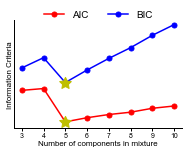

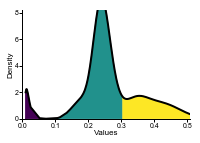

In [4]:
# fit model to measurement data
classify_on = 'r'
selector = ModelSelection(data[classify_on].values, classify_on=classify_on, max_num_components=10)
cell_classifier = selector.BIC_optimal
selector.plot_information_criteria()
#selector.plot_models(ymax=6)
cell_classifier.plot_pdf()

# score all layers in stack

In [5]:
layer_id = 0
layer = stack[layer_id]

# build graph and fit katz labeler
layer.build_graph(layer.data, logratio=True)

katz_labeler = KatzLabeler(layer.graph, cell_classifier, label='katz_genotype', alpha=0.9)
infomap_labeler = InfomapLabeler(layer.graph, cell_classifier, label='infomap_genotype', twolevel=True, rule='proportional')

# label layer
katz_labeler(layer.data)
infomap_labeler(layer.data)

layer_data = layer.data[layer.data.selected]

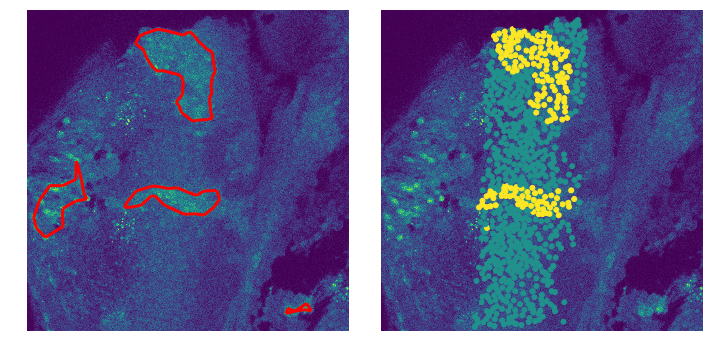

In [10]:
xy = layer_data[['centroid_x', 'centroid_y']].values
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
for ax in axes:
    _ = layer.get_channel('r').show(segments=False, ax=ax)
axes[1].scatter(*xy.T, s=25, c=layer_data.katz_genotype, cmap=plt.cm.viridis)
plt.tight_layout()

layer.plot_boundary(axes[0], label=2, label_by='katz_genotype', lw=3)